In [11]:
import sys
import os
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, PROJECT_ROOT)

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from generators.smote_generator import SMOTEGenerator
from generators.cluster_smote import ClusterSMOTE
from evaluation.evaluate import evaluate_model

In [3]:
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=2,
    weights=[0.9, 0.1],
    random_state=42
)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [5]:
baseline = evaluate_model(X_train, X_test, y_train, y_test)
print("Baseline ROC-AUC:", baseline["roc_auc"])

Baseline ROC-AUC: 0.8930327377383379


In [6]:
smote = SMOTEGenerator()
X_sm, y_sm = smote.generate(X_train, y_train)

smote_result = evaluate_model(X_sm, X_test, y_sm, y_test)
print("SMOTE ROC-AUC:", smote_result["roc_auc"])

SMOTE ROC-AUC: 0.888955510253028


In [7]:
cluster_smote = ClusterSMOTE()
X_cs, y_cs = cluster_smote.generate(X_train, y_train)

cluster_result = evaluate_model(X_cs, X_test, y_cs, y_test)
print("Cluster-SMOTE ROC-AUC:", cluster_result["roc_auc"])

Cluster-SMOTE ROC-AUC: 0.8905144501738816


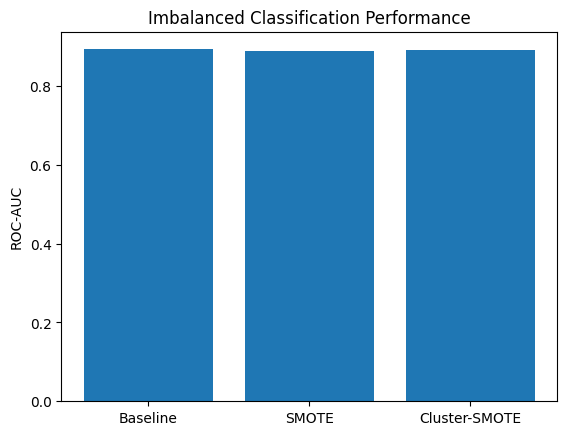

In [8]:
import matplotlib.pyplot as plt

methods = ["Baseline", "SMOTE", "Cluster-SMOTE"]
scores = [
    baseline["roc_auc"],
    smote_result["roc_auc"],
    cluster_result["roc_auc"]
]

plt.bar(methods, scores)
plt.ylabel("ROC-AUC")
plt.title("Imbalanced Classification Performance")
plt.show()

In [9]:
import pandas as pd

def extract_metrics(result):
    report = result["report"]
    return {
        "Precision (Minority)": report["1"]["precision"],
        "Recall (Minority)": report["1"]["recall"],
        "F1-Score (Minority)": report["1"]["f1-score"],
        "ROC-AUC": result["roc_auc"]
    }

metrics_df = pd.DataFrame.from_dict({
    "Baseline": extract_metrics(baseline),
    "SMOTE": extract_metrics(smote_result),
    "Cluster-SMOTE": extract_metrics(cluster_result)
}, orient="index")

metrics_df

,Precision (Minority),Recall (Minority),F1-Score (Minority),ROC-AUC
Baseline,0.666667,0.516129,0.581818,0.893033
SMOTE,0.400000,0.774194,0.527473,0.888956
Cluster-SMOTE,0.666667,0.451613,0.538462,0.890514


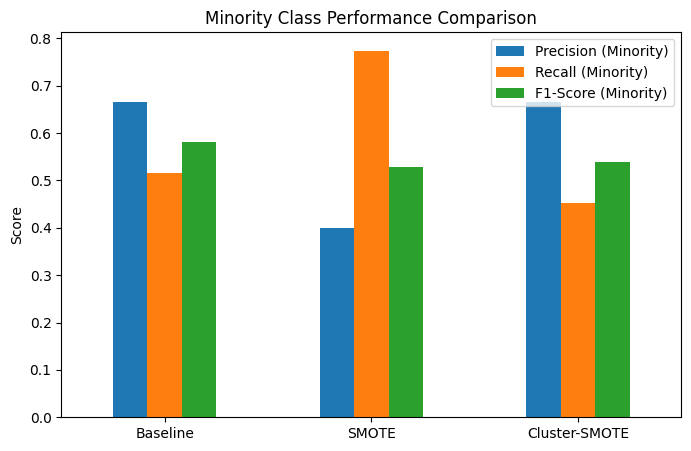

In [10]:
metrics_df[["Precision (Minority)", "Recall (Minority)", "F1-Score (Minority)"]].plot(
    kind="bar",
    figsize=(8, 5)
)
plt.title("Minority Class Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()